In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [12]:
climate_change = pd.read_csv("climate_change.csv",parse_dates = ['date'],index_col=0)
climate_change.head()

co2  relative_temp
date                             
1958-03-06  315.71           0.10
1958-04-06  317.45           0.01
1958-05-06  317.50           0.08
1958-06-06     NaN          -0.05
1958-07-06  315.86           0.06

In [14]:
climate_change.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 706 entries, 1958-03-06 to 2016-12-06
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   co2            699 non-null    float64
 1   relative_temp  706 non-null    float64
dtypes: float64(2)
memory usage: 16.5 KB


# Plotting time-series data

In [15]:
fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change['co2'])
ax.set_xlabel("Time")
ax.set_ylabel("CO2(ppm)")
plt.show()


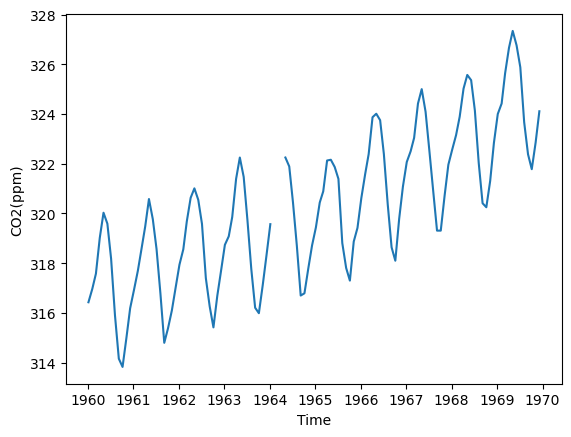

In [16]:
# Zooming in on a decade
sixties = climate_change['1960-01-01':'1969-12-31']
fig, ax = plt.subplots()
ax.plot(sixties.index,sixties['co2'])
ax.set_xlabel("Time")
ax.set_ylabel("CO2(ppm)")
plt.show()


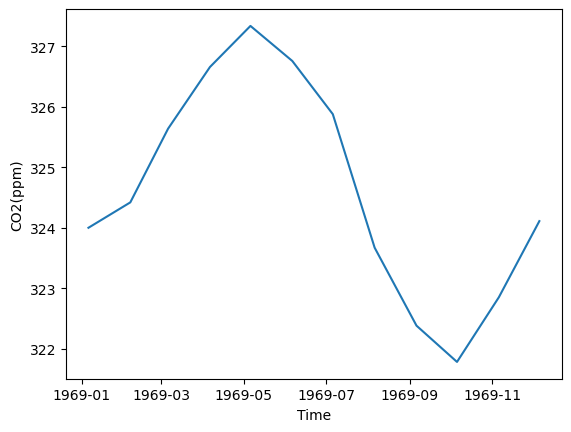

In [18]:
# Zooming in on a year 
sixty_nine= climate_change['1969-01-01':'1969-12-31']
fig, ax = plt.subplots()
ax.plot(sixty_nine.index,sixty_nine['co2'])
ax.set_xlabel("Time")
ax.set_ylabel("CO2(ppm)")

plt.show()

# Plotting two time-series together


In [19]:
fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change['co2'])

ax.plot(climate_change.index, climate_change['relative_temp'])
ax.set_xlabel("Time")

ax.set_ylabel("CO2(ppm)/Relative Temperature")
plt.show()

# Usinf twin axes

In [29]:
fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change['co2'])
ax.set_xlabel("Time", color='r')
ax.set_ylabel("CO2(ppm)", color='blue')
ax.tick_params("y", color='b')
ax2=ax.twinx()
ax2.plot(climate_change.index, climate_change['relative_temp'], color= 'g')
ax2.set_xlabel("Time",color='r')
ax2.tick_params('y', color='r')
ax2.set_ylabel("Relative Temperature", color='g')
plt.show()

# A function that plots time-series

In [30]:
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    axes.plot(x, y,color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.tick_params('y', color=color)


# Using our function


In [35]:
fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change['co2'])
ax.set_xlabel("Time")
ax.set_ylabel("CO2(ppm)", color='blue')
ax.tick_params("y", color='b')
ax2=ax.twinx()
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'],'red', 'Time', 'Relative Temperature(Celsious)')
plt.show()

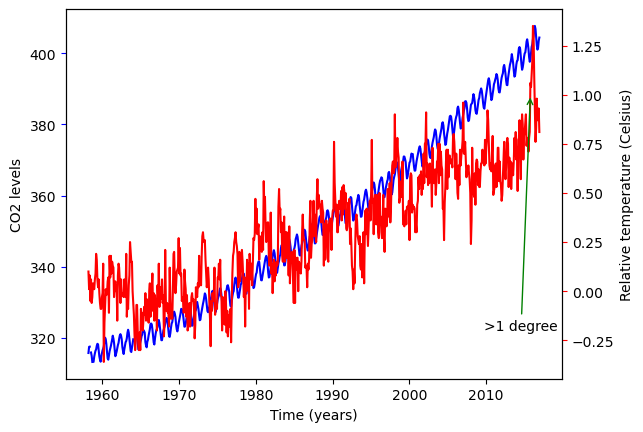

In [47]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], "blue", 'Time (years)', 'CO2 levels')

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], "red", 'Time (years)', 'Relative temperature (Celsius)')
ax2.annotate(">1 degree", xy = (pd.Timestamp("2015-10-06"),1 ),
            xytext=(pd.Timestamp('2009-10-06'), -0.2),# Positioning text 
            arrowprops={'arrowstyle':'->', 'color':'green'} # Adding arrows to annotation 
            )
# Positioning text 

plt.show()

In [48]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax,climate_change.index, climate_change['co2'], 'blue', 'Time (years)', 'CO2 levels')

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', 'Time (years)', 'Relative temp (Celsius)')

# Annotate point with relative temperature >1 degree
ax2.annotate(">1 degree", xy=(pd.Timestamp('2015-10-06'),1), xytext=(pd.Timestamp('2008-10-06'),-0.2), arrowprops={'arrowstyle':'->', 'color':'gray'})

plt.show()

# Introduction to Scatter plot

In [51]:
fig , ax = plt.subplots()
ax.scatter(climate_change['co2'], climate_change['relative_temp'])
ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative Temperature  (Celsius)")
plt.show()

Nicely done. Now, let's encode the time dimension with color.

## Customizing scatter plot


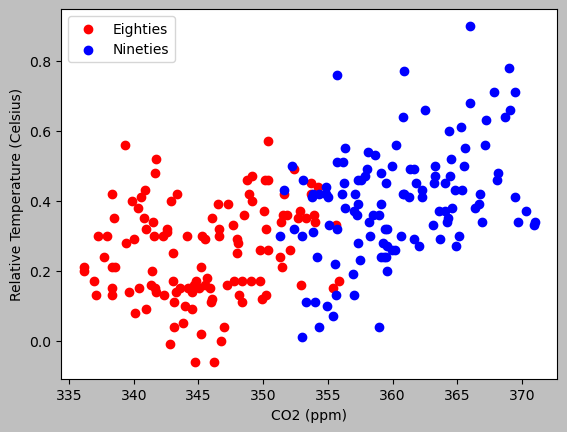

In [59]:
plt.style.use("grayscale")
eighties = climate_change['1980-01-01':'1989-12-31']
nineties = climate_change['1990-01-01':'1999-12-31']
fig, ax = plt.subplots()
ax.scatter(eighties['co2'], eighties['relative_temp'], label='Eighties', color='r')
ax.scatter(nineties['co2'], nineties['relative_temp'], label='Nineties', color='b')
ax.legend()
ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative Temperature (Celsius)")
plt.show()


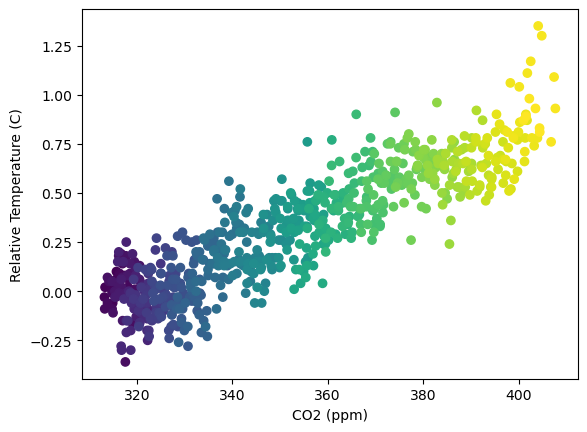

In [58]:
plt.style.use("default")
fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter(climate_change['co2'], climate_change['relative_temp'], c=climate_change.index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")


# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative Temperature (C)")

plt.show()

This is beautiful! In the next chapter you will learn to share you figures with others and how to automate their creation.